In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.



%matplotlib inline

in_file = 'properties_2016.csv'
prop_data = pd.read_csv(in_file)
train_data = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
merge_data = pd.merge(train_data, prop_data, on='parcelid', how='left')
merge_data.apply(le.fit_transform)
merge_data.head()

/home/satyam/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [12]:
total_missing = prop_data.isnull().sum()
to_delete = total_missing[total_missing>(prop_data.shape[0]/2.)]
to_delete.loc[0]



TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <type 'int'>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

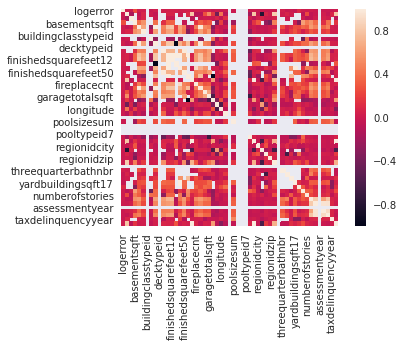

In [9]:
df = merge_data
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
#fig = plt.figure()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [ ]:
log_data = merge_data
log_data.fillna(log_data.median(), inplace=True)
log_data.fillna(log_data.mean(), inplace=True)
log_data
merge_data2 = log_data
# Produce a scatter matrix for each pair of features in the data
# For each feature find the data points with extreme high or low values
for feature in merge_data2.keys():
    if merge_data2[feature].dtype != np.float64:
        continue
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(merge_data2[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(merge_data2[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    merge_data2 = (merge_data2[((merge_data2[feature] >= Q1 - step) & (merge_data2[feature] <= Q3 + step))])

In [3]:
merge_data.head()
missing_df = merge_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / merge_data.shape[0]
missing_df

,column_name,missing_count,missing_ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,airconditioningtypeid,0,0.000000
4,architecturalstyletypeid,0,0.000000
5,basementsqft,0,0.000000
6,bathroomcnt,0,0.000000
7,bedroomcnt,0,0.000000
8,buildingclasstypeid,0,0.000000
9,buildingqualitytypeid,0,0.000000


In [4]:
log_data.head()
missing_df = log_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / log_data.shape[0]

In [12]:
missing_df

,column_name,missing_count,missing_ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,airconditioningtypeid,0,0.000000
4,architecturalstyletypeid,0,0.000000
5,basementsqft,0,0.000000
6,bathroomcnt,0,0.000000
7,bedroomcnt,0,0.000000
8,buildingclasstypeid,0,0.000000
9,buildingqualitytypeid,0,0.000000


In [5]:
merge_data2['hashottuborspa']

6           1
25          1
38          1
48          1
49          1
50          1
63          1
73          1
78          1
87          1
90          1
91          1
104         1
117         1
122         1
125         1
130         1
139         1
145         1
159         1
160         1
171         1
172         1
213         1
221         1
223         1
225         1
228         1
234         1
245      True
         ... 
90101       1
90110       1
90127       1
90131       1
90134       1
90141       1
90143       1
90144       1
90153       1
90156       1
90163       1
90164       1
90166       1
90168       1
90171       1
90177       1
90178       1
90179       1
90186       1
90189       1
90191       1
90208       1
90224       1
90228       1
90229       1
90234       1
90251       1
90254       1
90268       1
90269       1
Name: hashottuborspa, Length: 10422, dtype: object

In [6]:
good_data=merge_data2
print "Wholesale customers dataset has {} samples with {} features each.".format(*good_data.shape)

#good_data.drop(['transactiondate'], axis = 1, inplace = True)
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=54).fit(good_data)
reduced_data = pca.transform(good_data)
reduced_data
# Generate PCA results plot


Wholesale customers dataset has 10422 samples with 60 features each.


ValueError: could not convert string to float: Y

Dimension 1     1.0
Dimension 2     1.0
Dimension 3     1.0
Dimension 4     1.0
Dimension 5     1.0
Dimension 6     1.0
Dimension 7     1.0
Dimension 8     1.0
Dimension 9     1.0
Dimension 10    1.0
Dimension 11    1.0
Dimension 12    1.0
Dimension 13    1.0
Dimension 14    1.0
Dimension 15    1.0
Dimension 16    1.0
Dimension 17    1.0
Dimension 18    1.0
Dimension 19    1.0
Dimension 20    1.0
Dimension 21    1.0
Dimension 22    1.0
Dimension 23    1.0
Dimension 24    1.0
Dimension 25    1.0
Dimension 26    1.0
Dimension 27    1.0
Dimension 28    1.0
Dimension 29    1.0
Dimension 30    1.0
Dimension 31    1.0
Dimension 32    1.0
Dimension 33    1.0
Dimension 34    1.0
Dimension 35    1.0
Dimension 36    1.0
Dimension 37    1.0
Dimension 38    1.0
Dimension 39    1.0
Dimension 40    1.0
Dimension 41    1.0
Dimension 42    1.0
Dimension 43    1.0
Dimension 44    1.0
Dimension 45    1.0
Dimension 46    1.0
Dimension 47    1.0
Dimension 48    1.0
Dimension 49    1.0
Dimension 50    1.0


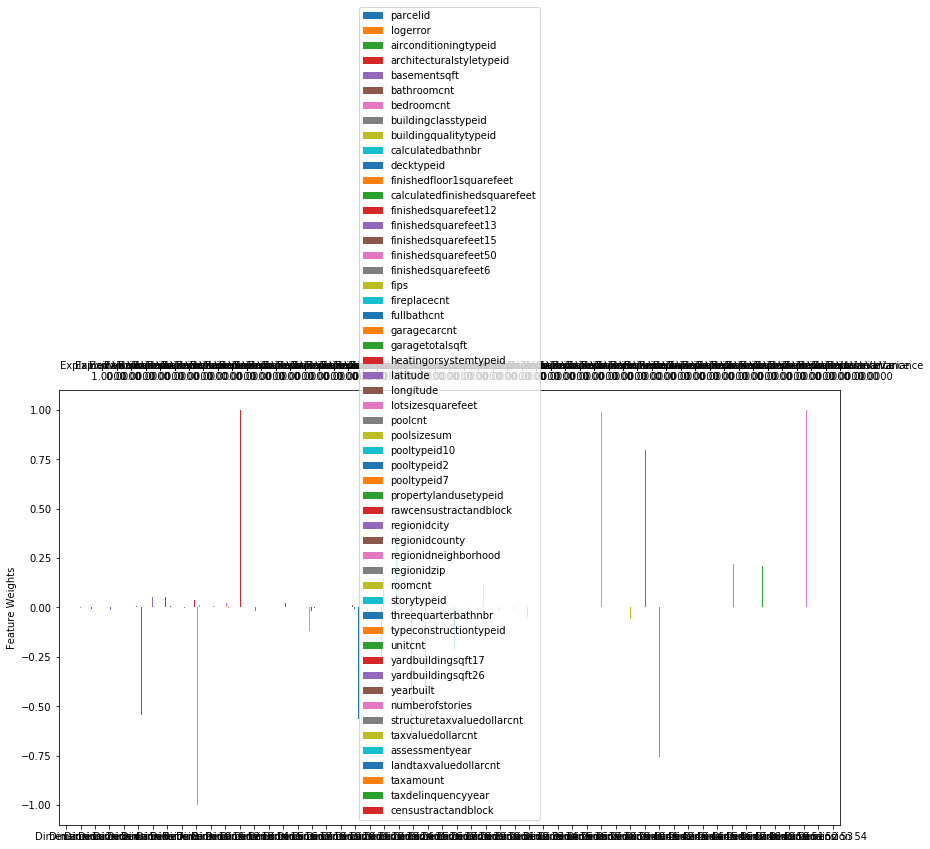

In [46]:
import visuals as vs
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print pca_results['Explained Variance'].cumsum()